In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   

#read observation data
obs_data = pd.read_csv("observations.csv")
#read species data  
species_data = pd.read_csv("species_info.csv")


all_data = pd.merge(obs_data, species_data, on = "scientific_name", how = "left")
print(all_data.head())

print(all_data.scientific_name.nunique())


            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5541


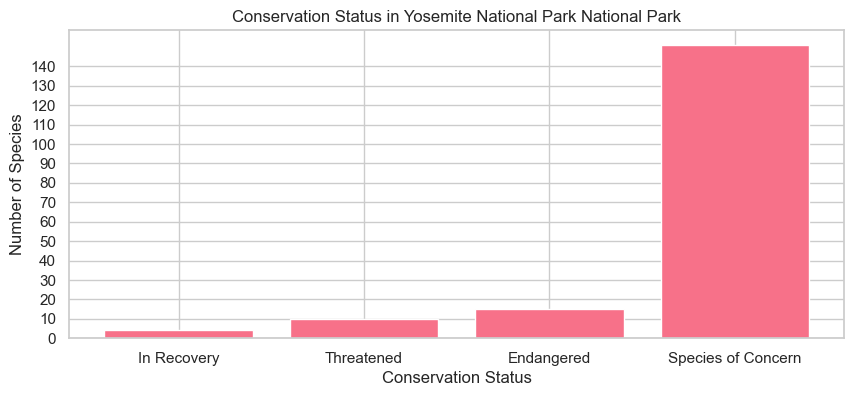

<Figure size 640x480 with 0 Axes>

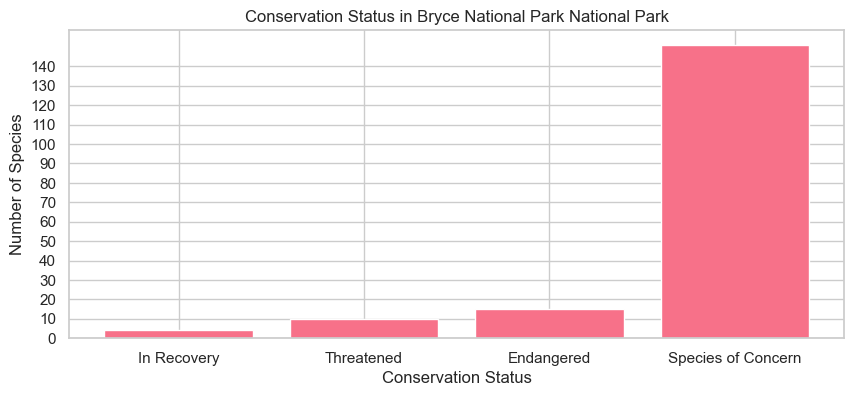

<Figure size 640x480 with 0 Axes>

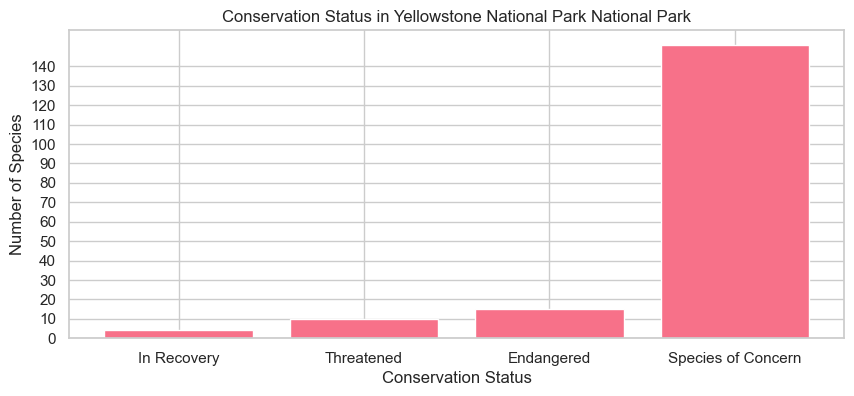

<Figure size 640x480 with 0 Axes>

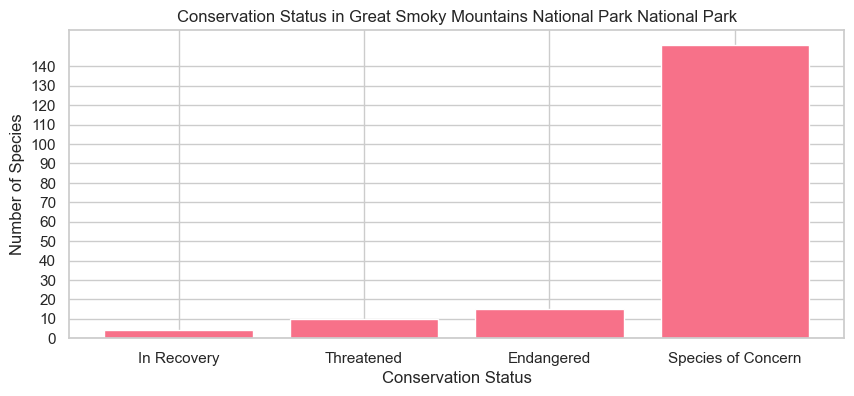

<Figure size 640x480 with 0 Axes>

In [76]:
#Conservation Status by Park
class ParkConservationStatus:
  def __init__(self, park_name):
    self.park_name = park_name
  def get_park_name(self):
    return self.park_name
  def get_conservation_status(self):
    park_data = all_data[all_data.park_name == self.park_name]
    park_data = park_data.groupby("conservation_status").scientific_name.nunique().reset_index().sort_values(by = "scientific_name").rename(columns = {"scientific_name": "number_of_species"})
    return park_data

class plotParkConservationStatus:
  def __init__(self, park_name):
    self.park_name = park_name
  def plot(self):
    park = ParkConservationStatus(self.park_name).get_conservation_status()
    plt.figure(figsize=(10, 4))
    ax = plt.subplot()
    plt.bar(range(len(park)), park.number_of_species.values)
    ax.set_yticks(np.arange(0, 150, 10))
    ax.set_xticks(range(len(park)))
    ax.set_xticklabels(park.conservation_status.values)
    plt.xlabel("Conservation Status")
    plt.ylabel("Number of Species")
    plt.title("Conservation Status in {} National Park".format(self.park_name))
    plt.show()
    plt.clf()

yosemite = ParkConservationStatus("Yosemite National Park").get_conservation_status()
bryce = ParkConservationStatus("Bryce National Park").get_conservation_status()
yellowstone = ParkConservationStatus("Yellowstone National Park").get_conservation_status()
great_smoky_mountains = ParkConservationStatus("Great Smoky Mountains National Park").get_conservation_status()

yosemite_plot = plotParkConservationStatus("Yosemite National Park").plot()
bryce_plot = plotParkConservationStatus("Bryce National Park").plot()
yellowstone_plot = plotParkConservationStatus("Yellowstone National Park").plot()
great_smoky_mountains_plot = plotParkConservationStatus("Great Smoky Mountains National Park").plot()




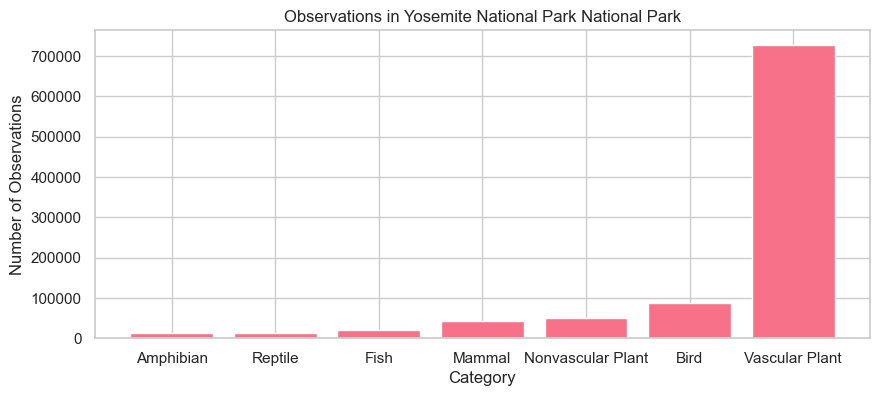

<Figure size 640x480 with 0 Axes>

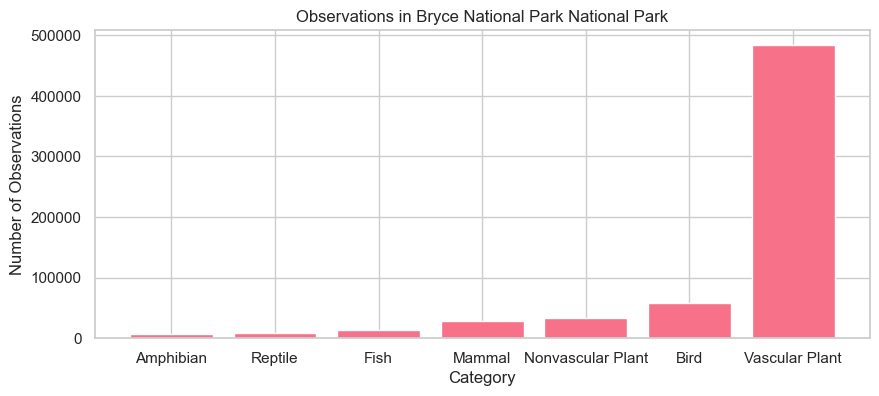

<Figure size 640x480 with 0 Axes>

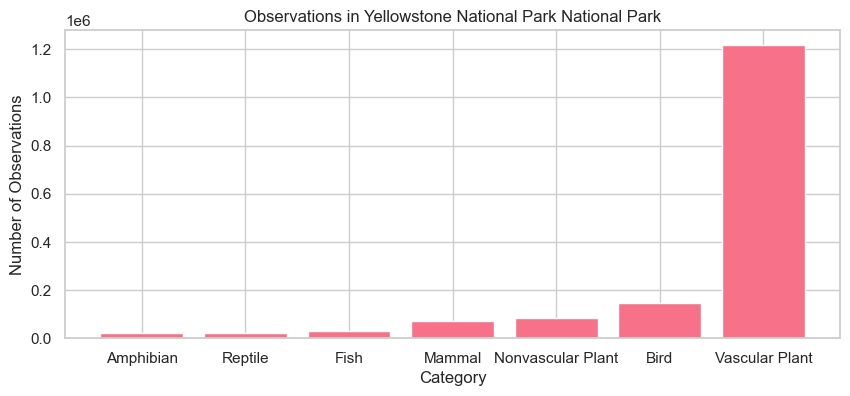

<Figure size 640x480 with 0 Axes>

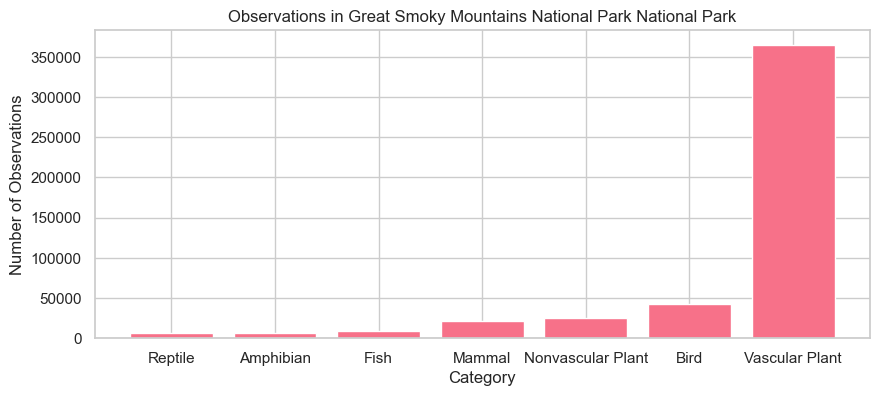

<Figure size 640x480 with 0 Axes>

In [77]:
#Observation of Species by Park

class ParkObservation:
    def __init__(self, park_name):
        self.park_name = park_name
    def get_park_name(self):
        return self.park_name
    def get_observations(self):
        park_data = all_data[all_data.park_name == self.park_name]
        park_data = park_data.groupby("category").observations.sum().reset_index().sort_values(by = "observations").rename(columns = {"observations": "number_of_observations"})
        return park_data
    
class plotParkObservation:
    def __init__(self, park_name):
        self.park_name = park_name
    def plot(self):
        park = ParkObservation(self.park_name).get_observations()
        plt.figure(figsize=(10, 4))
        ax = plt.subplot()
        plt.bar(range(len(park)), park.number_of_observations.values)
        ax.set_xticks(range(len(park)))
        ax.set_xticklabels(park.category.values)
        plt.xlabel("Category")
        plt.ylabel("Number of Observations")
        plt.title("Observations in {} National Park".format(self.park_name))
        plt.show()
        plt.clf()

yosemite_observation = ParkObservation("Yosemite National Park").get_observations()
bryce_observation = ParkObservation("Bryce National Park").get_observations()
yellowstone_observation = ParkObservation("Yellowstone National Park").get_observations()
great_smoky_mountains_observation = ParkObservation("Great Smoky Mountains National Park").get_observations()

yosemite_observation_plot = plotParkObservation("Yosemite National Park").plot()
bryce_observation_plot = plotParkObservation("Bryce National Park").plot()
yellowstone_observation_plot = plotParkObservation("Yellowstone National Park").plot()
great_smoky_mountains_observation_plot = plotParkObservation("Great Smoky Mountains National Park").plot()


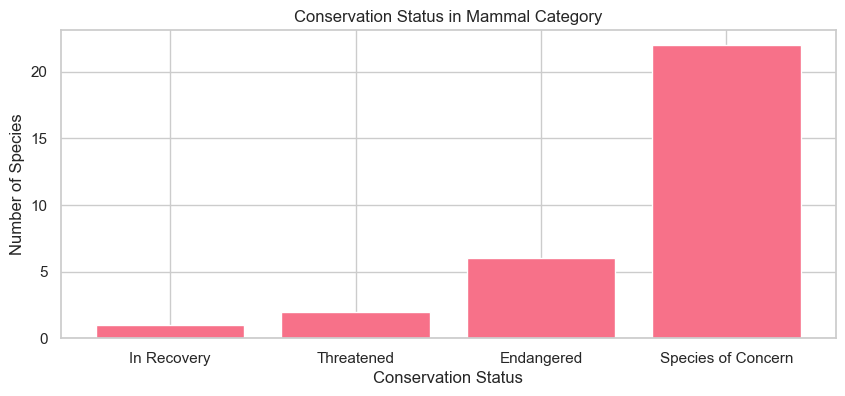

<Figure size 640x480 with 0 Axes>

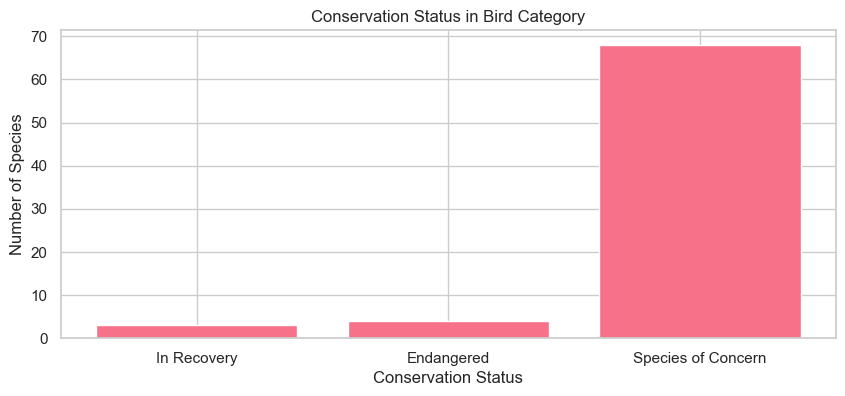

<Figure size 640x480 with 0 Axes>

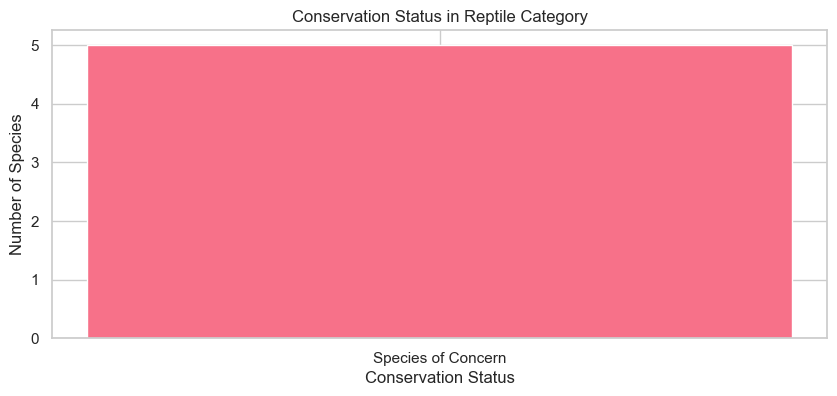

<Figure size 640x480 with 0 Axes>

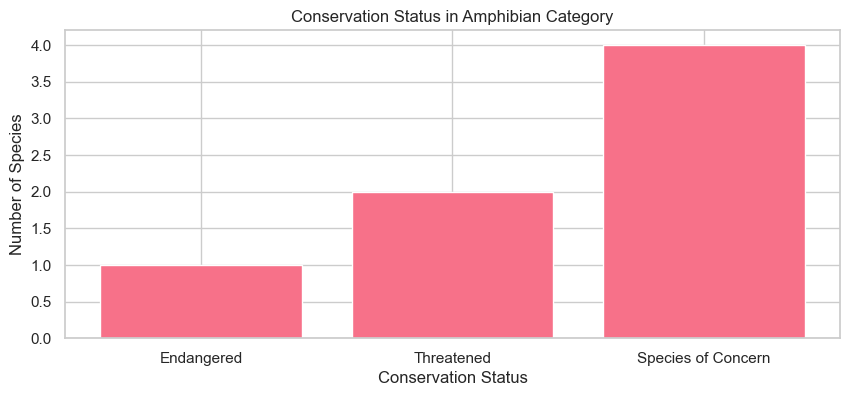

<Figure size 640x480 with 0 Axes>

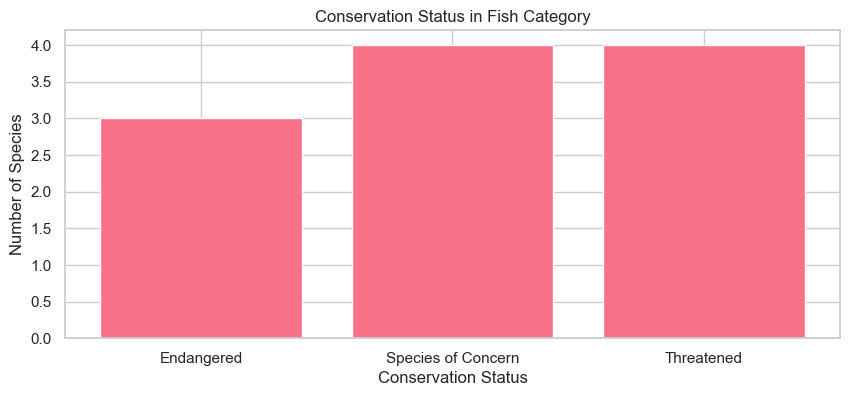

<Figure size 640x480 with 0 Axes>

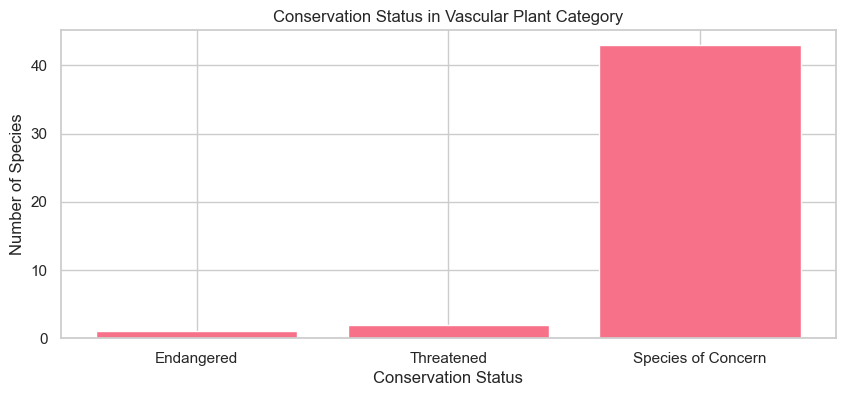

<Figure size 640x480 with 0 Axes>

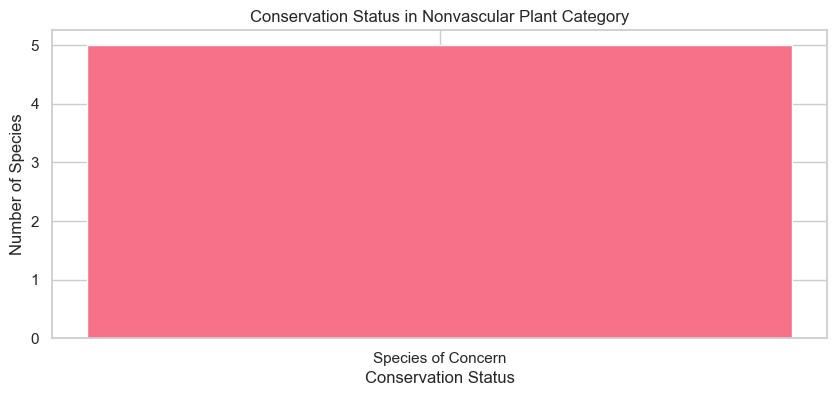

<Figure size 640x480 with 0 Axes>

In [78]:
#conservation status by category ignoring nan values

class ConservationStatusByCategory:
    def __init__(self, category):
        self.category = category
    def get_category(self):
        return self.category
    def get_conservation_status(self):
        category_data = all_data[all_data.category == self.category]
        category_data = category_data.groupby("conservation_status").scientific_name.nunique().reset_index().sort_values(by = "scientific_name").rename(columns = {"scientific_name": "number_of_species"})
        return category_data
    
class plotConservationStatusByCategory:
    def __init__(self, category):
        self.category = category
    def plot(self):
        category = ConservationStatusByCategory(self.category).get_conservation_status()
        plt.figure(figsize=(10, 4))
        ax = plt.subplot()
        plt.bar(range(len(category)), category.number_of_species.values)
        ax.set_xticks(range(len(category)))
        ax.set_xticklabels(category.conservation_status.values)
        plt.xlabel("Conservation Status")
        plt.ylabel("Number of Species")
        plt.title("Conservation Status in {} Category".format(self.category))
        plt.show()
        plt.clf()

mammal = ConservationStatusByCategory("Mammal").get_conservation_status()
bird = ConservationStatusByCategory("Bird").get_conservation_status()
reptile = ConservationStatusByCategory("Reptile").get_conservation_status()
amphibian = ConservationStatusByCategory("Amphibian").get_conservation_status()
fish = ConservationStatusByCategory("Fish").get_conservation_status()
vascular_plant = ConservationStatusByCategory("Vascular Plant").get_conservation_status()
nonvascular_plant = ConservationStatusByCategory("Nonvascular Plant").get_conservation_status()

plotConservationStatusByCategory("Mammal").plot()
plotConservationStatusByCategory("Bird").plot()
plotConservationStatusByCategory("Reptile").plot()
plotConservationStatusByCategory("Amphibian").plot()
plotConservationStatusByCategory("Fish").plot()
plotConservationStatusByCategory("Vascular Plant").plot()
plotConservationStatusByCategory("Nonvascular Plant").plot()



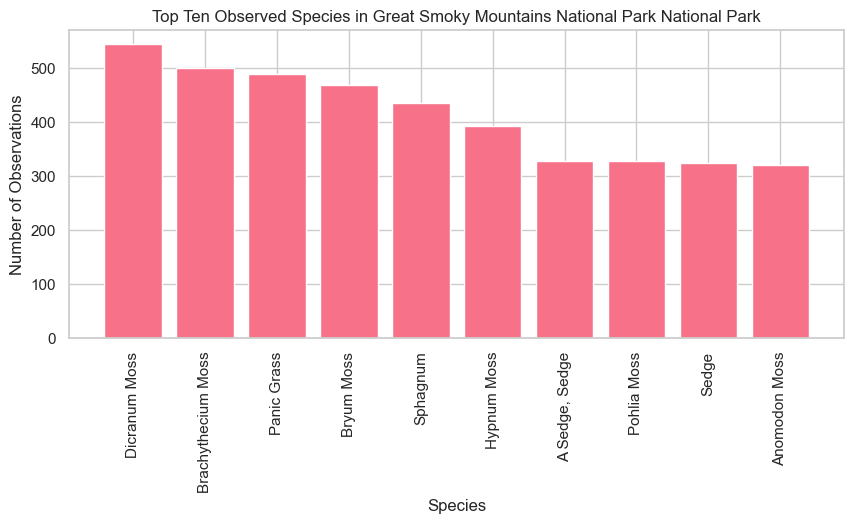

<Figure size 640x480 with 0 Axes>

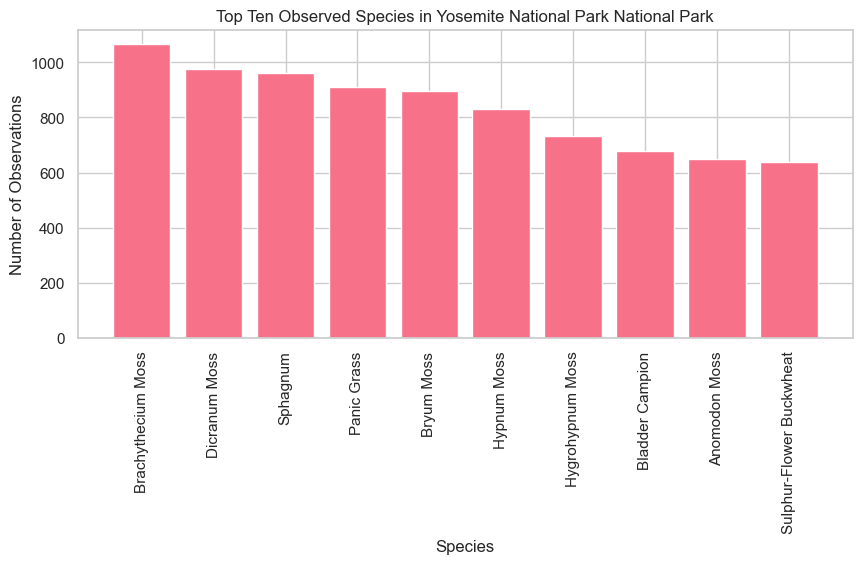

<Figure size 640x480 with 0 Axes>

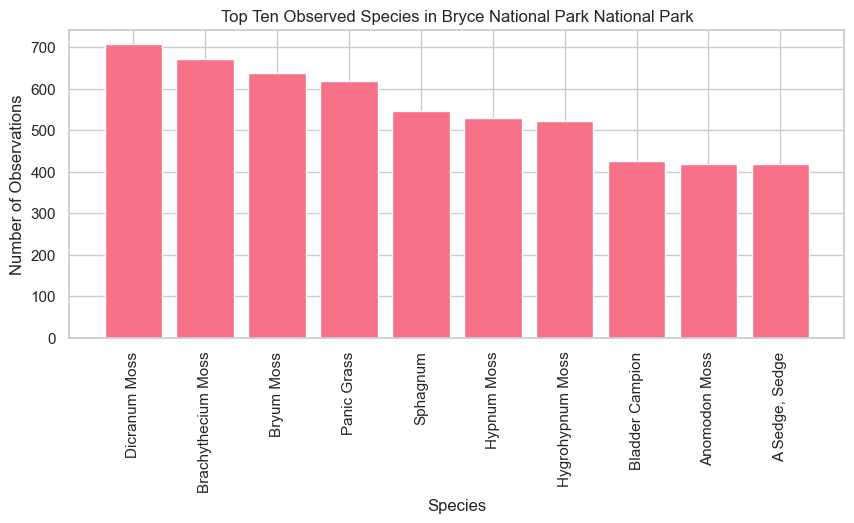

<Figure size 640x480 with 0 Axes>

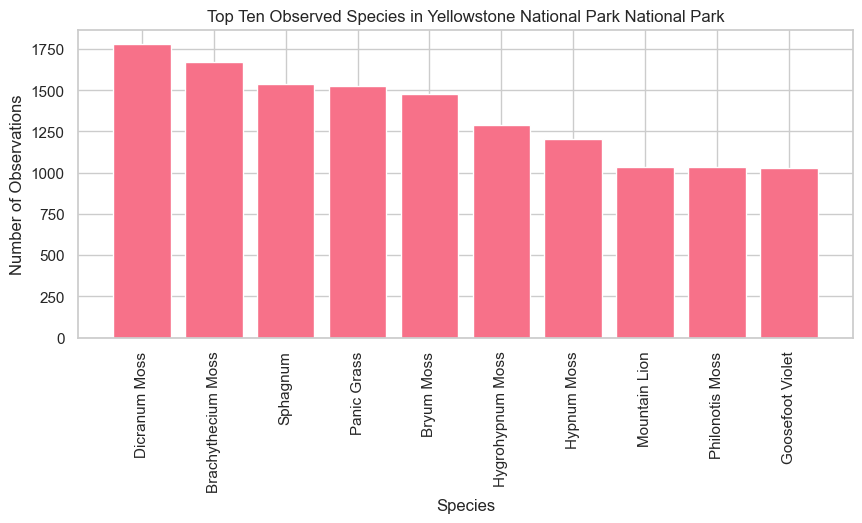

<Figure size 640x480 with 0 Axes>

In [79]:
#observations of the 10 most observed species by park

class TopTenSpeciesByPark:
    def __init__(self, park_name):
        self.park_name = park_name
    def get_park_name(self):
        return self.park_name
    def get_top_ten_species(self):
        park_data = all_data[all_data.park_name == self.park_name]
        park_data = park_data.groupby("common_names").observations.sum().reset_index().sort_values(by = "observations", ascending = False).head(10)
        return park_data
    
class plotTopTenSpeciesByPark:
    def __init__(self, park_name):
        self.park_name = park_name
    def plot(self):
        park = TopTenSpeciesByPark(self.park_name).get_top_ten_species()
        plt.figure(figsize=(10, 4))
        ax = plt.subplot()
        plt.bar(range(len(park)), park.observations.values)
        ax.set_xticks(range(len(park)))
        ax.set_xticklabels(park.common_names.values, rotation = 90)
        plt.xlabel("Species")
        plt.ylabel("Number of Observations")
        plt.title("Top Ten Observed Species in {} National Park".format(self.park_name))
        plt.show()
        plt.clf()

for park in all_data.park_name.unique():
    plotTopTenSpeciesByPark(park).plot()
